In [ ]:
!wget https://www.dropbox.com/scl/fi/kw0f2dd5l97sb2xooau8h/archive-10.zip?rlkey=d2o8esgneg0yhhbakwhuafhgo&dl=0

In [ ]:
!unzip /content/dataset

In [6]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import imutils



def crop_img(img):

	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)

	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

	return new_img

if __name__ == "__main__":
	training = "Training"
	testing = "Testing"
	training_dir = os.listdir(training)
	testing_dir = os.listdir(testing)
	IMG_SIZE = 256

	for dir in training_dir:
		save_path = 'dataset/Training/'+ dir
		path = os.path.join(training,dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path,img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

	for dir in testing_dir:
		save_path = 'dataset/Testing/'+ dir
		path = os.path.join(testing,dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path,img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "/content/dataset/Training/glioma"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "/content/dataset/Training/meningioma"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "/content/dataset/Training/pituitary"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "/content/dataset/Training/notumor"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [ ]:
import os

base_dir = '/content/dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/Training'))

In [12]:
train_dir = os.path.join(base_dir, 'Training')

train_glioma_dir = os.path.join(train_dir, 'glioma')
train_meningioma_dir = os.path.join(train_dir, 'meningioma')
train_pituitary_dir = os.path.join(train_dir, 'pituitary')
train_notumor_dir = os.path.join(train_dir, 'notumor')

In [ ]:
train_glioma_fnames = os.listdir(train_glioma_dir)
train_meningioma_fnames = os.listdir(train_meningioma_dir)
train_pituitary_fnames = os.listdir(train_pituitary_dir)
train_notumor_fnames = os.listdir(train_notumor_dir)

In [ ]:
print('total training glioma images :', len(os.listdir(train_glioma_dir)))
print('total training meningioma images :', len(os.listdir(train_meningioma_dir)))
print('total training pituitary images :', len(os.listdir(train_pituitary_dir)))
print('total training notumor images :', len(os.listdir(train_notumor_dir)))

In [23]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=50,
                                                    class_mode='categorical',
                                                    target_size=(300, 300))

In [ ]:
history = model.fit(
            train_generator,
            epochs=5,
            verbose=2)

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "/content/dataset/Training/glioma"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "/content/dataset/Training/meningioma"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "/content/dataset/Training/pituitary"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "/content/dataset/Training/notumor"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [33]:
testing_dir = os.path.join(base_dir, 'Testing')

testing_glioma_dir = os.path.join(testing_dir, 'glioma')
testing_meningioma_dir = os.path.join(testing_dir, 'meningioma')
testing_pituitary_dir = os.path.join(testing_dir, 'pituitary')
testing_notumor_dir = os.path.join(testing_dir, 'notumor')

In [35]:
testing_glioma_fnames = os.listdir(testing_glioma_dir)
testing_meningioma_fnames = os.listdir(testing_meningioma_dir)
testing_pituitary_fnames = os.listdir(testing_pituitary_dir)
testing_notumor_fnames = os.listdir(testing_notumor_dir)

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(300, 300))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  x = classes[0]
  print([x])
  maxVal = 0
  index = 0
  for i in range(len(x)-1):
    if(x[i] > maxVal):
      maxVal = x[i]
      index = i
print(x)
print(index)

1/1 [==============================] - 0s 132ms/step


<ipython-input-61-23ac7e2ccfbd>:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


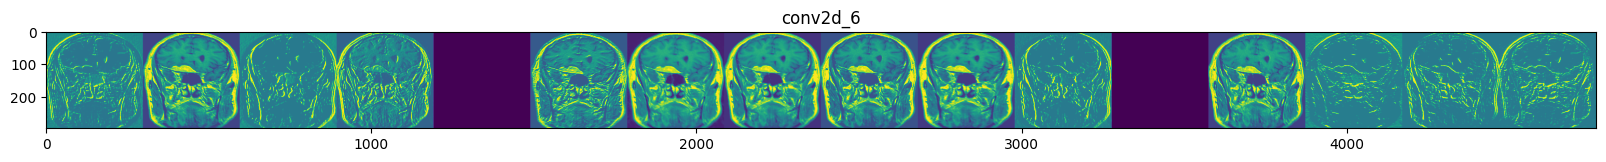

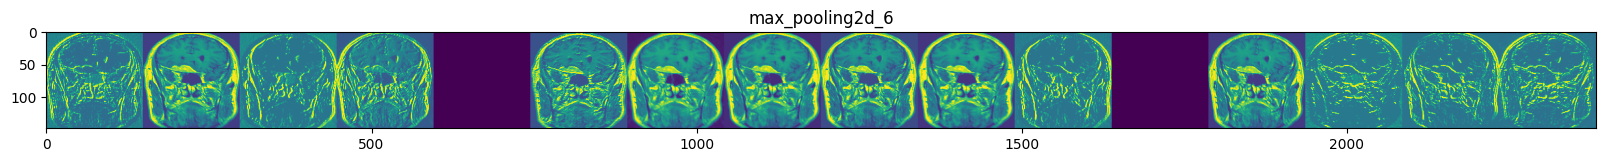

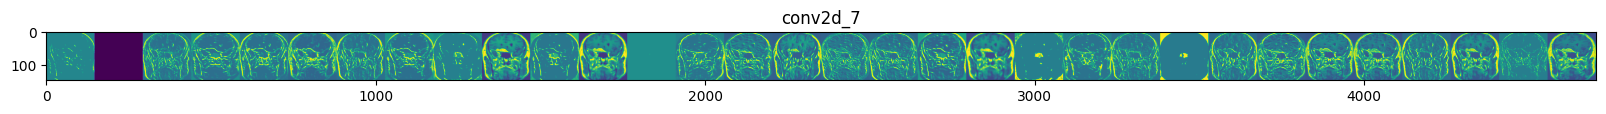

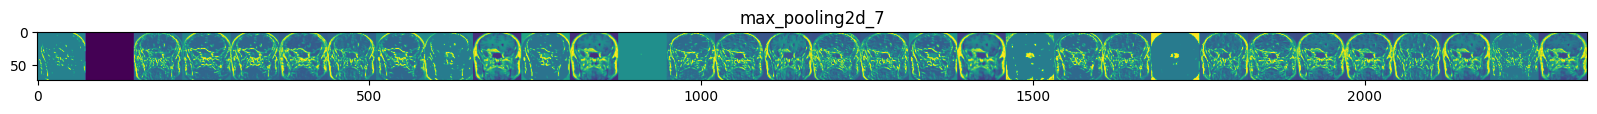

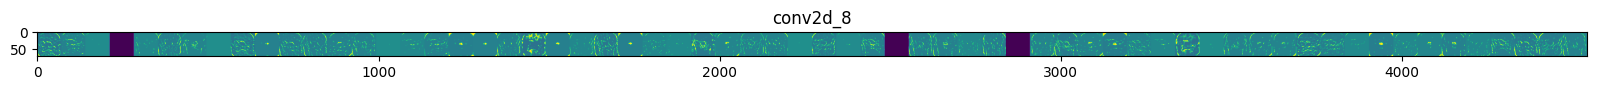

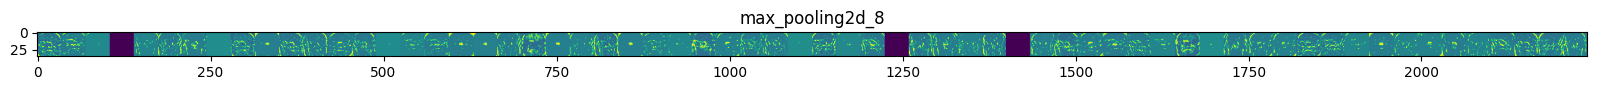

In [61]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt

successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

gioma_img_files = [os.path.join(train_glioma_dir, f) for f in train_glioma_fnames]
notumor_img_files = [os.path.join(train_notumor_dir, f) for f in train_notumor_fnames]
meningioma_img_files = [os.path.join(train_meningioma_dir, f) for f in train_meningioma_fnames]
pituitary_img_files = [os.path.join(train_pituitary_dir, f) for f in train_pituitary_fnames]
img_path = random.choice(gioma_img_files + meningioma_img_files + notumor_img_files + pituitary_img_files)
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size*n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size:(i + 1)*size] = x

    scale = 20./n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training loss')

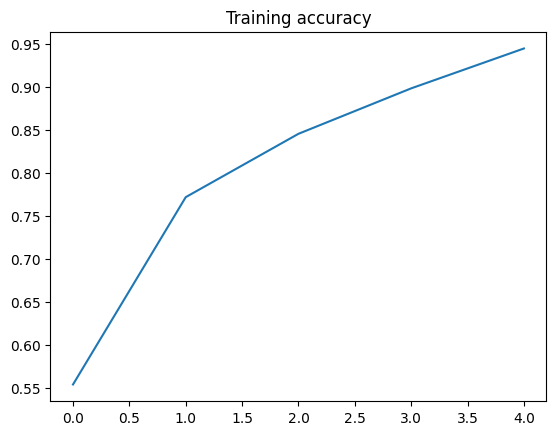

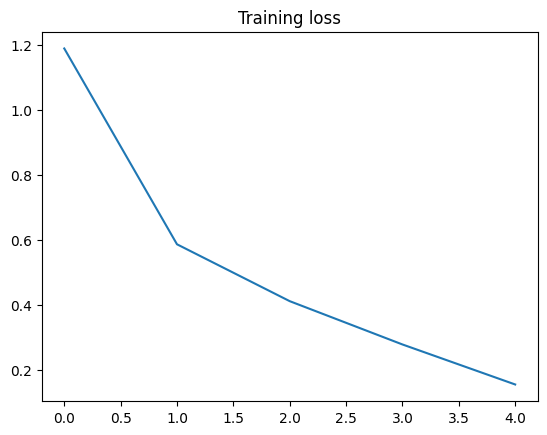

In [62]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot  (epochs, acc)
plt.title ('Training accuracy')
plt.figure()

plt.plot  ( epochs, loss)
plt.title ('Training loss')

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
